# **PES University**
**Srushti S N**

**PES2UG20CS352**


**Worksheet 3b**

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('doge.csv')
df.head()

,Date,Price
0,2021-08-15,0.348722
1,2021-08-16,0.349838
2,2021-08-17,0.345208
3,2021-08-18,0.331844
4,2021-08-19,0.321622


In [4]:
df.set_index(df["Date"], inplace=True)

Problem 1

<AxesSubplot:xlabel='Date'>

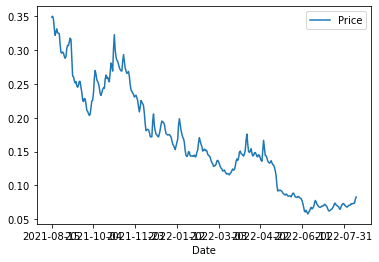

In [ ]:
df.plot("Date","Price")

In the above graph, we can see a trend and hence the model is non stationary.

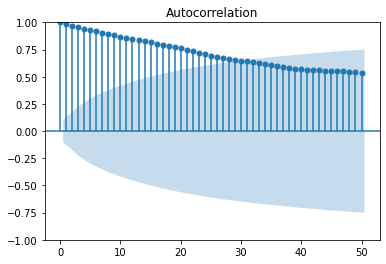

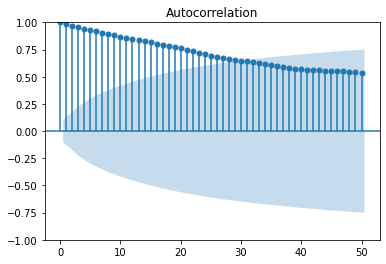

In [13]:
from statsmodels.graphics.tsaplots import plot_acf as acf


acf(df.Price, lags = 50)

We see that it is a non stationary model due to the *slowly decreasing correlation value*.

Problem 2

In [20]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test


def print_adf_results(adf_result):
    print('ADF Statistic: %f'%adf_result[0])
    print('p-value: %f'%adf_result[1])
    print('Critical Values:')
    for key,value in adf_result[4].items():
        print('\t%s: %.3f'%(key,value))

print_adf_results(adfuller(df.Price))

ADF Statistic: -1.558935
p-value: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Since p value is greater than 0.05 it is statistically significant. Thus we fail to reject null hypothesis, which means that it is non stationary.

This means we need to transform  data into stationary to be able to analyse the data.

In [41]:
#Applying differencing to df
#transformed_df = df
#transformed_df['newPrice'] = transformed_df['Price'] - transformed_df['Price'].shift(1)
#transformed_df['newPrice'].dropna().plot()
transformed_df = (np.sqrt(df['Price'])).diff().dropna()

In [42]:
Xval=transformed_df.values
adf_result = adfuller(Xval, autolag = 'AIC')
print_adf_results(adf_result)

ADF Statistic: -5.339160
p-value: 0.000005
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


We see that the value of p is now less than 0.05 thus we reject null hypothesis and hence the model is stationary.

Problem 3

C:\Users\Srushti\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


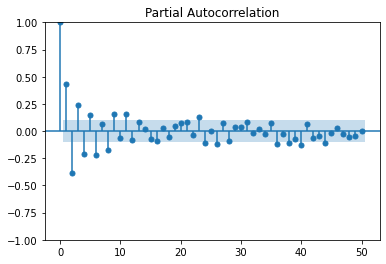

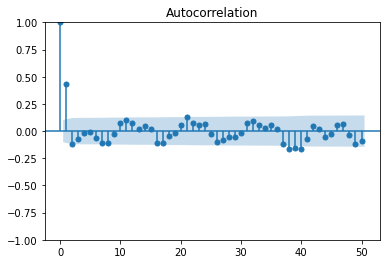

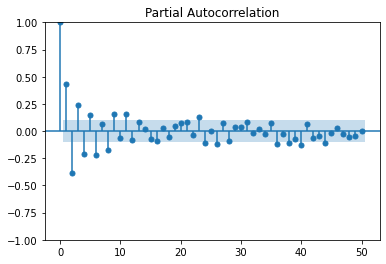

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_acf(transformed_df, lags=50)
plot_pacf(transformed_df, lags=50)

From PACF and ACF model we get:
q = 1

given p+q=3
p = 2 (I am only doing this because I found looking for p in PACF hard.)

Problem 5

C:\Users\Srushti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


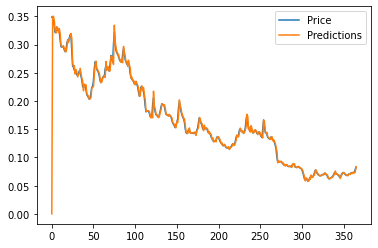

In [52]:
from statsmodels.tsa.arima.model import ARIMA
#p=1, d=1, q=1
model5 = ARIMA(df.Price, order = (2, 1, 1)) 
res=model5.fit()

#predictions
df['Predictions'] = res.predict(0, len(df)-1)
df.plot()
plt.show()

It is seen that actual price and predicted price overlap one another.

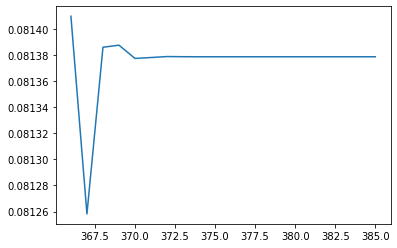

In [53]:
#forecast
res.forecast(20).plot()
plt.show()

In [54]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(res.resid, lags=[8], return_df=True)

,lb_stat,lb_pvalue
8,0.648411,0.999644


Values of p = 0.999644> 0.05. Thus, we accept null hypothesis.